### Задание 3.
Работа с txt-файлом Загрузите данные из ******.txt.

- Откройте файл и выведите первые 10 строк.
- В импортированных данных найдите максимальное, минимальное, среднее значения в
числовых столбцах. Визуализируйте это с помощью box plot для произвольного столбца.
Сопоставьте результаты.

In [ ]:
import pandas as pd

df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0)

df.head(10)

<ipython-input-9-3a5af02fed70>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0)


ParserError: Error tokenizing data. C error: Expected 15 fields in line 71, saw 16


In [ ]:
import pandas as pd

df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0, on_bad_lines='skip')

# предупреждение, если какие-либо строки были пропущены
try:
    num_bad_lines = df.attrs.get('num_bad_lines', 0)
    if num_bad_lines > 0:
        print(f"Пропущено {num_bad_lines} некорректных строк.")
except AttributeError:
    pass  # игнорировать, если атрибут 'num_bad_lines' не найден

df.head(10)

<ipython-input-11-379fb500ecd5>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Boston-_2_.txt", delim_whitespace=True, index_col=0, on_bad_lines='skip')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9




- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
stats = df.describe().loc[['min', 'max', 'mean']]
stats

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.12960,1.000000,187.000000,12.600000,0.320000,1.730000,5.00000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.12650,24.000000,711.000000,22.000000,396.900000,37.970000,50.00000
mean,3.620425,11.361386,11.146812,0.069307,0.554984,6.285426,68.645347,3.78969,9.560396,408.362376,18.454653,356.594376,12.660713,22.53604


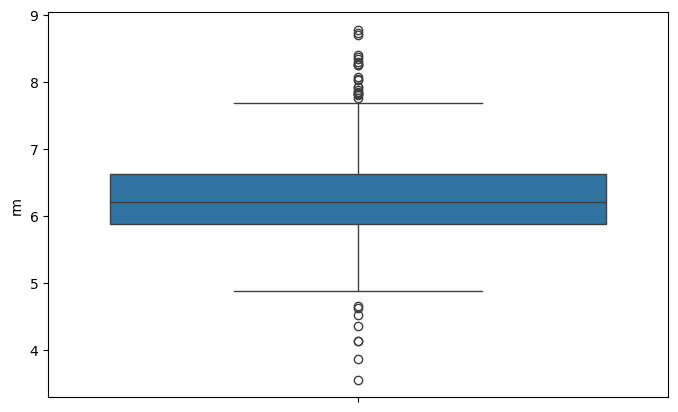

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['rm'])
plt.show()


- Постройте матрицу корреляции признаков.
- Постройте диаграмму рассеяния (для признаков, имеющих высокие коэффициенты
корреляции с MEDV).

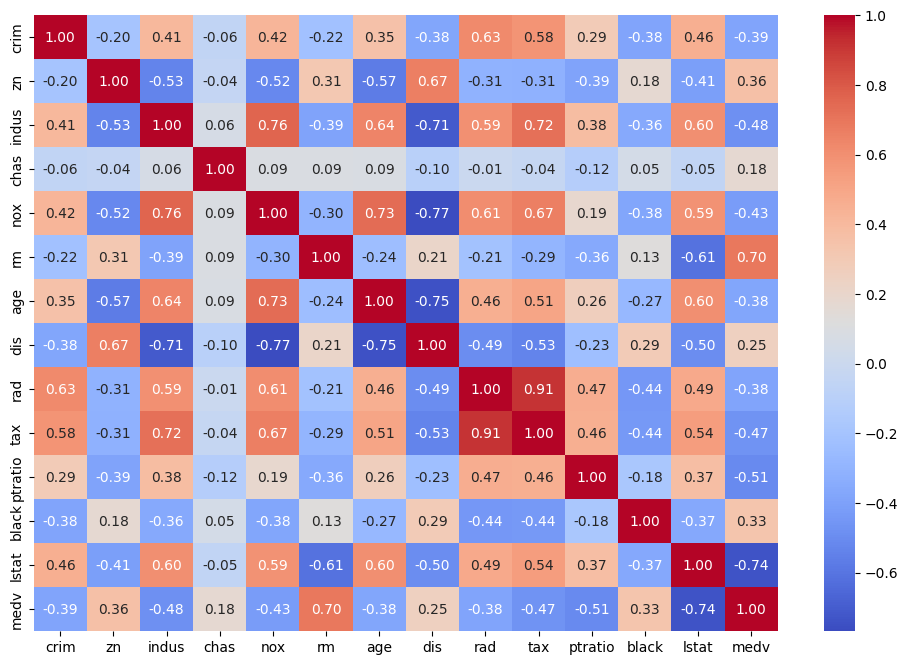

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
# Диаграмма рассеяния для признаков, сильно коррелирующих с MEDV
correlation = df.corr()["medv"].abs().sort_values(ascending=False)
high_corr_features = correlation[correlation > 0.5].index.drop("medv")
high_corr_features

Index(['lstat', 'rm', 'ptratio'], dtype='object')

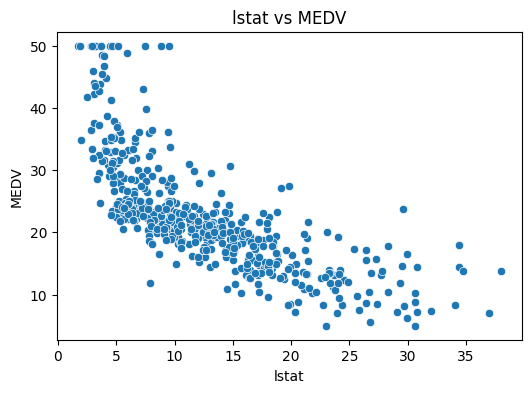

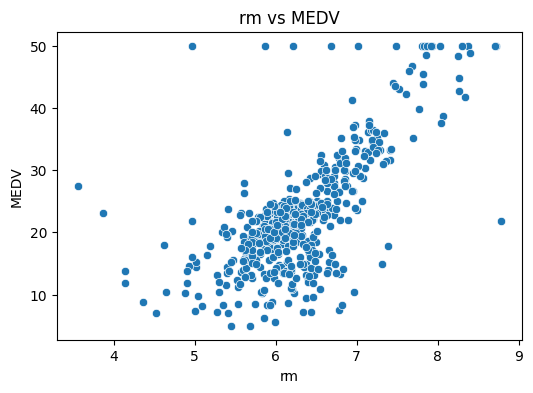

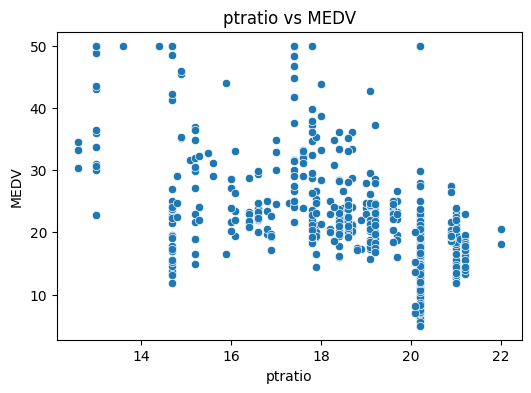

In [ ]:
for feature in high_corr_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df["medv"])
    plt.xlabel(feature)
    plt.ylabel("MEDV")
    plt.title(f"{feature} vs MEDV")
    plt.show()

### Задание 4.

Получение данных из API Выберите открытый API (https://open-meteo.com/ для
доступа к информации с погодой). Используйте библиотеку requests для получения
данных. Преобразуйте полученные данные в удобную таблицу (pandas DataFrame).
- Постройте временной ряд изменения значений.
- Автоматизируйте процесс: напишите функцию, которая запрашивает данные каждые 30
минут и строит обновляемый график.
- Сравните данные за разные временные промежутки.
- Измените координаты, чтобы получить данные о погоде в другом городе.
- Добавьте получение минимальной температуры (temperature_2m_min) и постройте две
линии на графике.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

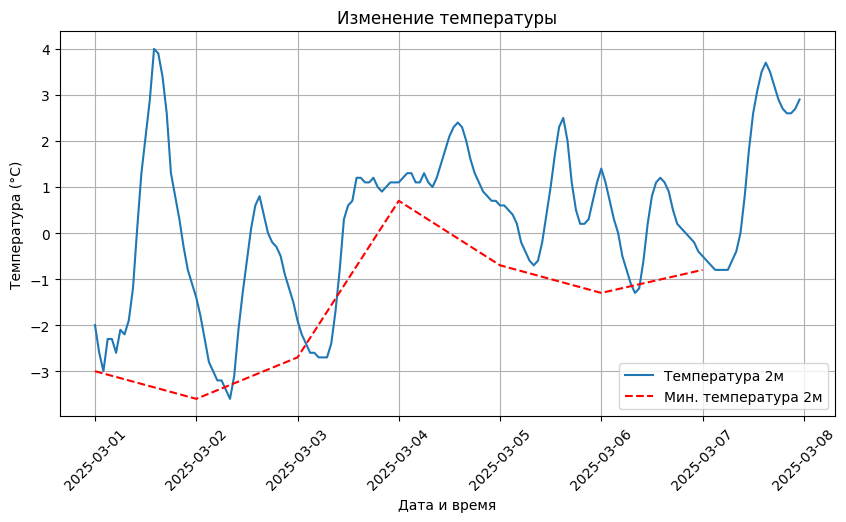

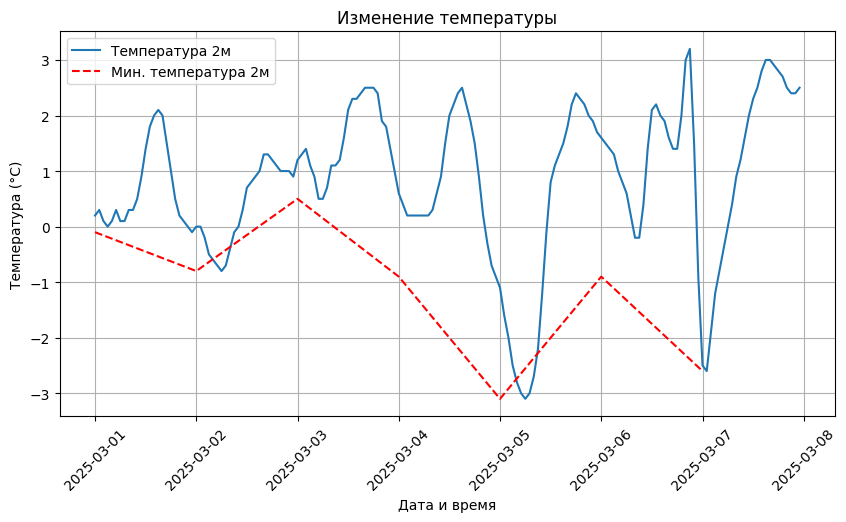

In [ ]:
def get_weather_data(latitude, longitude):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "hourly": ["temperature_2m"],
        "daily": ["temperature_2m_min"],
        "timezone": "auto"
    }
    response = requests.get(url, params=params)
    data = response.json()

    hourly_data = data["hourly"]
    daily_data = data["daily"]

    df_hourly = pd.DataFrame({
        "datetime": pd.to_datetime(hourly_data["time"]),
        "temperature_2m": hourly_data["temperature_2m"]
    })

    df_daily = pd.DataFrame({
        "date": pd.to_datetime(daily_data["time"]).date,
        "temperature_2m_min": daily_data["temperature_2m_min"]
    })

    return df_hourly, df_daily

def plot_weather(df_hourly, df_daily):
    plt.figure(figsize=(10, 5))
    plt.plot(df_hourly["datetime"], df_hourly["temperature_2m"], label="Температура 2м")
    #plt.scatter(df_daily["date"], df_daily["temperature_2m_min"], color='red', label="Мин. температура 2м")
    plt.plot(df_daily["date"], df_daily["temperature_2m_min"], label="Мин. температура 2м", linestyle='dashed', color='red')
    plt.xlabel("Дата и время")
    plt.ylabel("Температура (°C)")
    plt.title("Изменение температуры")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

def automated_weather_tracking(latitude, longitude, interval=1800):
    while True:
        df_hourly, df_daily = get_weather_data(latitude, longitude)
        plot_weather(df_hourly, df_daily)
        print(f"Обновлено: {datetime.now()} - Следующее обновление через {interval / 60} минут")
        time.sleep(interval)

# пример: Москва
latitude, longitude = 55.7558, 37.6173

hourly_data, daily_data = get_weather_data(latitude, longitude)
plot_weather(hourly_data, daily_data)

latitude, longitude = 59.57, 30.19

hourly_data, daily_data = get_weather_data(latitude, longitude)
plot_weather(hourly_data, daily_data)


# автоматическое обновление (можно запустить отдельно)
# automated_weather_tracking(latitude, longitude)

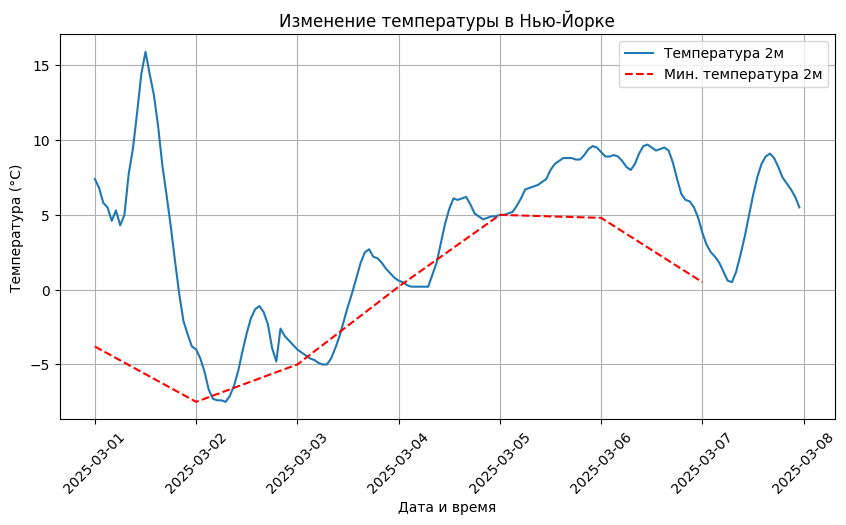

Средняя температура за сутки:
            temperature_2m
datetime                  
2025-03-01        6.404167
2025-03-02       -4.412500
2025-03-03       -1.441667
2025-03-04        3.229167
2025-03-05        7.512500
2025-03-06        8.250000
2025-03-07        4.904167


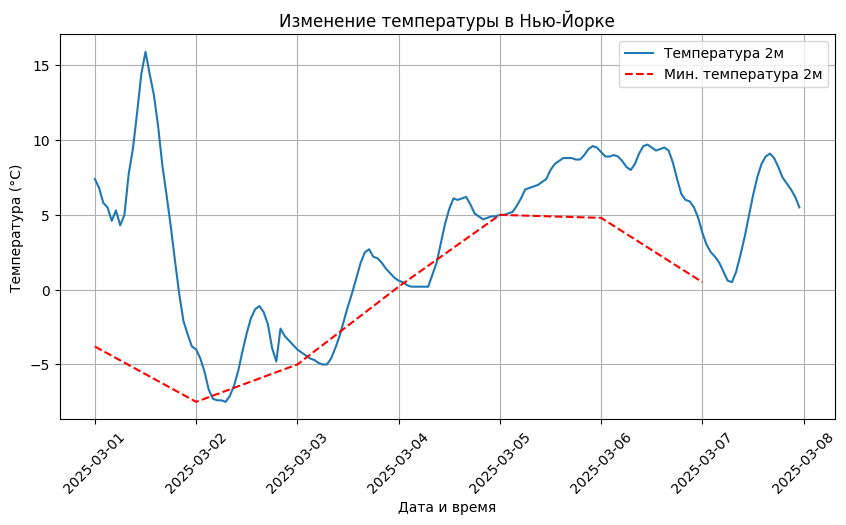

Обновлено: 2025-03-01 08:35:33.594307 - Следующее обновление через 30.0 минут


KeyboardInterrupt: 

In [ ]:
# координаты Нью-Йорка
latitude, longitude = 40.7128, -74.0060

# запрашиваю данные
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": latitude,
    "longitude": longitude,
    "hourly": ["temperature_2m"],
    "daily": ["temperature_2m_min"],
    "timezone": "auto"
}
response = requests.get(url, params=params)
data = response.json()

# преобразование данных
hourly_data = data["hourly"]
daily_data = data["daily"]

df_hourly = pd.DataFrame({
    "datetime": pd.to_datetime(hourly_data["time"]),
    "temperature_2m": hourly_data["temperature_2m"]
})

df_daily = pd.DataFrame({
    "date": pd.to_datetime(daily_data["time"]).date,
    "temperature_2m_min": daily_data["temperature_2m_min"]
})

plt.figure(figsize=(10, 5))
plt.plot(df_hourly["datetime"], df_hourly["temperature_2m"], label="Температура 2м")
plt.plot(df_daily["date"], df_daily["temperature_2m_min"], label="Мин. температура 2м", linestyle='dashed', color='red')
plt.xlabel("Дата и время")
plt.ylabel("Температура (°C)")
plt.title("Изменение температуры в Нью-Йорке")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# сравниваю данные за разные временные промежутки
print("Средняя температура за сутки:")
print(df_hourly.resample('D', on='datetime').mean())

# автоматическое обновление
interval = 1800
while True:
    response = requests.get(url, params=params)
    data = response.json()
    hourly_data = data["hourly"]
    daily_data = data["daily"]
    df_hourly = pd.DataFrame({
        "datetime": pd.to_datetime(hourly_data["time"]),
        "temperature_2m": hourly_data["temperature_2m"]
    })
    df_daily = pd.DataFrame({
        "date": pd.to_datetime(daily_data["time"]).date,
        "temperature_2m_min": daily_data["temperature_2m_min"]
    })
    plt.figure(figsize=(10, 5))
    plt.plot(df_hourly["datetime"], df_hourly["temperature_2m"], label="Температура 2м")
    plt.plot(df_daily["date"], df_daily["temperature_2m_min"], label="Мин. температура 2м", linestyle='dashed', color='red')
    plt.xlabel("Дата и время")
    plt.ylabel("Температура (°C)")
    plt.title("Изменение температуры в Нью-Йорке")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    print(f"Обновлено: {datetime.now()} - Следующее обновление через {interval / 60} минут")
    time.sleep(interval)
